### <b> Ensemble Learning </b>

### <b> Learning Objectives </b>
By the end of this lesson, you will be able to:
- Define ensemble learning
- List different types of ensemble methods
- Build an intuition
- Apply different algorithms of ensemble learning using use cases

### <b> What Is Ensemble Learning? </b>

Ensemble techniques combine individual models to improve the stability and predictive power of the model.

#### <b> Ideology Behind Ensemble Learning: </b>

* Certain models do well in modeling one aspect of the data, while others do well in modeling another.

* Instead of learning a single complex model, learn several simple models and combine their output to produce the final decision.

* Individual model variances and biases are balanced by the strength of other models in ensemble learning.

* Ensemble learning will provide a composite prediction where the final accuracy is better than the accuracy of individual models.

#### <b> Working of Ensemble Learning </b>

![Ensemble_Learning_Workflow](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/Applied_Machine_Learning/Images/Lesson_07_Ensemble_Learning/Ensemble_Learning_Workflow.png)

#### <b> Significance of Ensemble Learning </b>

* Robustness
  - Ensemble models incorporate the predictions from all the base learners
* Accuracy
  - Ensemble models deliver accurate predictions and have improved performances

#### <b> Ensemble Learning Methods </b>

* Techniques for creating an ensemble model
* Combine all weak learners to form an ensemble, or create an ensemble of well-chosen strong and diverse models

#### <b> Steps Involved in Ensemble Methods </b>

Every ensemble algorithm consists of two steps:

* Producing a cohort of predictions using simple ML algorithms
* Combining the predictions into one aggregated model

The ensemble can be achieved through several techniques.

### <b> Types of Ensemble Methods </b>

#### <b> Averaging </b>


![Averaging](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/Applied_Machine_Learning/Images/Lesson_07_Ensemble_Learning/Averaging.png)

#### <b> Weighted Averaging </b>

![Weighted_Averaging](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/Applied_Machine_Learning/Images/Lesson_07_Ensemble_Learning/Weighted_Averaging.png)

### <b> Bagging Algorithms </b>

Bootstrap Aggregation or bagging involves taking multiple samples from your training dataset (with replacement) and training a model for each sample.

The final output prediction is averaged across the predictions of all of the submodels.

The three bagging models covered in this section are as follows:

 - Bagged Decision Trees
 - Random Forest
 - Extra Trees

#### <b> 1. Bagged Decision Trees </b>

Bagging performs best with algorithms that have a high variance. A popular example is decision trees, often constructed without pruning.

Below, you can see an example of using the BaggingClassifier with the Classification and Regression Trees algorithm (DecisionTreeClassifier). A total of 100 trees are created.


- Scikit-learn is a Python library that provides a consistent interface for machine learning and statistical modeling, including classification, regression, clustering, and dimensionality reduction.
- Pandas is a Python library for data manipulation and analysis.

In [1]:
#Bagged Decision Trees for Classification
import pandas
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pandas.read_csv(url, names=names)

In [3]:
dataframe.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
dataframe.shape

(768, 9)

In [5]:
array = dataframe.values

X = array[:,0:8]
Y = array[:,8]

In [7]:
seed = 7

kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
cart = DecisionTreeClassifier()
num_trees = 100

In [11]:
from sklearn.ensemble import BaggingClassifier

model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)

results = model_selection.cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.7473000683526999


In [9]:
seed = 10

kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
cart = DecisionTreeClassifier()
num_trees = 100

model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)

results = model_selection.cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.7473000683526999


In [10]:
results

array([0.75324675, 0.79220779, 0.72727273, 0.71428571, 0.77922078,
       0.76623377, 0.7012987 , 0.81818182, 0.68421053, 0.73684211])

#### <b> 2. Random Forest </b> 

Random forest is an extension of bagged decision trees.

Samples of the training dataset are taken with replacement, but the trees are constructed in a way that reduces the correlation between individual classifiers. Specifically, rather than greedily choosing the best split point in the construction of the tree, only a random subset of features is considered for each split.

You can construct a Random Forest model for classification using the RandomForestClassifier class.

The example below provides a sample of Random Forest for classification with 100 trees and split points chosen from a random selection of three features.



In [19]:
#Random Forest Classification
import pandas
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier

In [21]:
rfModel=RandomForestClassifier(max_features=3)

In [ ]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pandas.read_csv(url, names=names)
array = dataframe.values

X = array[:,0:8]
Y = array[:,8]
seed = 7
num_trees = 100
max_features = 3

kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = model_selection.cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.7721975393028024


#### <b> 3. Extra Trees</b>

Extra Trees are another modification of bagging where random trees are constructed from samples of the training dataset.

You can construct an Extra Trees model for classification using the ExtraTreesClassifier class.

The example below provides a demonstration of extra trees with a tree set of 100 and splits chosen from seven random features.



In [13]:
#Extra Trees Classification
import pandas
from sklearn import model_selection
from sklearn.ensemble import ExtraTreesClassifier
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pandas.read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
seed = 7
num_trees = 100
max_features = 7
x_train,x_test,y_train,y_test = model_selection.train_test_split(X,Y, random_state=seed, shuffle=True)

In [14]:
model = ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)

In [15]:
model.fit(x_train,y_train)

ExtraTreesClassifier(max_features=7)

In [16]:
model.score(x_train,y_train)

1.0

In [17]:
model.score(x_test,y_test)

0.7864583333333334

###  <b> Boosting Algorithms </b>

Boosting ensemble algorithms create a sequence of models that attempts to correct the mistakes of the models before them in the sequence.

Once created, the models make predictions that may be weighted by their demonstrated accuracy, and the results are combined to create a final output prediction.


The two most common boosting ensemble machine learning algorithms are:

- AdaBoost

- Stochastic Gradient Boosting
<br>

#### <b> AdaBoost </b>

AdaBoost was the first successful boosting ensemble algorithm. It generally works by weighting instances in the dataset by how easy or difficult they are to classify, allowing the algorithm to pay more or less attention to them in the construction of subsequent models.


![AdaBoost](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/Applied_Machine_Learning/Images/Lesson_07_Ensemble_Learning/AdaBoost.png)

You can construct an AdaBoost model for classification using the AdaBoostClassifier class.

The example below demonstrates the construction of 30 decision trees in sequence using the AdaBoost algorithm.


In [31]:
#AdaBoost Classification
import pandas
from sklearn import model_selection
from sklearn.ensemble import AdaBoostClassifier

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

dataframe = pandas.read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]

seed = 7
num_trees = 30

x_train,x_test,y_train,y_test = model_selection.train_test_split(X,Y, random_state=seed, shuffle=True)
model = AdaBoostClassifier(n_estimators=500, random_state=seed,learning_rate=0.01)

model.fit(x_train,y_train)

from sklearn.metrics import classification_report

trainPred=model.predict(x_train)
testPred=model.predict(x_test)

print(classification_report(y_train,trainPred))

print(classification_report(y_test,testPred))

0.7552802460697198


#### <b> Stochastic Gradient Boosting </b>

One of the most advanced ensemble approaches is Stochastic Gradient Boosting (also known as Gradient Boosting Machines). It's also a strategy that's proven to be one of the most effective methods for boosting performance via ensemble.

#### <b> Steps of Gradient Boasting Machine </b>

![GBM_Steps](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/Applied_Machine_Learning/Images/Lesson_07_Ensemble_Learning/GBM_Steps.PNG)

You can construct a Gradient Boosting model for classification using the **GradientBoostingClassifier** class.

The example below demonstrates Stochastic Gradient Boosting for classification with 100 trees.


In [32]:
#Stochastic Gradient Boosting Classification
import pandas
from sklearn import model_selection
from sklearn.ensemble import GradientBoostingClassifier

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pandas.read_csv(url, names=names)

array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
seed = 7
num_trees = 100

x_train,x_test,y_train,y_test = model_selection.train_test_split(X,Y, random_state=seed, shuffle=True)
model = GradientBoostingClassifier(n_estimators=500, random_state=seed)

model.fit(x_train,y_train)

from sklearn.metrics import classification_report

trainPred=model.predict(x_train)
testPred=model.predict(x_test)

print(classification_report(y_train,trainPred))

print(classification_report(y_test,testPred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       378
         1.0       1.00      1.00      1.00       198

    accuracy                           1.00       576
   macro avg       1.00      1.00      1.00       576
weighted avg       1.00      1.00      1.00       576

              precision    recall  f1-score   support

         0.0       0.76      0.84      0.80       122
         1.0       0.67      0.54      0.60        70

    accuracy                           0.73       192
   macro avg       0.71      0.69      0.70       192
weighted avg       0.73      0.73      0.73       192



In [43]:
# fine Tuning Gradient Boost Model
model = GradientBoostingClassifier(n_estimators=50, random_state=seed,min_samples_split=20,max_depth=5,min_samples_leaf=10,learning_rate=0.1)

model.fit(x_train,y_train)

from sklearn.metrics import classification_report

trainPred=model.predict(x_train)
testPred=model.predict(x_test)

print(classification_report(y_train,trainPred))

print(classification_report(y_test,testPred))

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97       378
         1.0       0.97      0.93      0.95       198

    accuracy                           0.97       576
   macro avg       0.97      0.96      0.96       576
weighted avg       0.97      0.97      0.97       576

              precision    recall  f1-score   support

         0.0       0.80      0.86      0.83       122
         1.0       0.72      0.61      0.66        70

    accuracy                           0.77       192
   macro avg       0.76      0.74      0.74       192
weighted avg       0.77      0.77      0.77       192



### CatBoost

CatBoost is an algorithm for gradient boosting on decision trees. It is developed by Yandex researchers and engineers and is used for search, recommendation systems, personal assistants, self-driving cars, weather prediction, and many other tasks at Yandex and in other companies, including CERN, Cloudflare, Careem taxi. It is open-source and can be used by anyone.

Let's study this with the help of a use case.


#### <b> Data Description </b>
The data consists of real historical data collected from 2010 & 2011. Employees are manually allowed or denied access to resources over time. You must create an algorithm capable of learning from this historical data to predict approval or denial for an unknown set of employees.

#### <b> File Descriptions </b>

**train.csv:** It is a training set. Each row has the action (ground truth), resources, and information about the employee's role at the time of approval.

**test.csv:** It is the test set for which predictions should be made. Each row asks whether an employee having the listed characteristics should have access to the listed resource.

The objective is to develop a model from historical data that will decide the access needs of an employee so that manual access transactions (grants and revocations) are reduced as the attributes of the employee change over time. The model will take information on the position of an employee and a resource code and return whether access should be given or not.

Note: The problem statement is from a Kaggle contest

The objective is to develop a model from historical data, that will decide the access needs of an employee, so that manual access transactions (grants and revocations) are reduced as the attributes of the employee change over time. The model will take information on the position of an employee and a resource code and return whether access should be given or not. <br>
`Note: The problem statement is from a Kaggle contest`

#### <b> Libraries Installation </b>

In [1]:
#Installing CatBoost
!pip install catboost

In [2]:
#To import libraries
import catboost
print(catboost.__version__)
!python --version

1.0.6
Python 2.7.17


#### <b> Reading the Data </b>

In [3]:
#To read the data
import pandas as pd
import os
import numpy as np
np.set_printoptions(precision=4)
from catboost import *
from catboost import datasets

In [4]:
(train_df, test_df) = catboost.datasets.amazon()

In [5]:
train_df.head()

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,1,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,1,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,1,42680,5905,117929,117930,119569,119323,123932,19793,119325


In [7]:
train_df.ACTION.value_counts()

1    30872
0     1897
Name: ACTION, dtype: int64

The data will be displayed on the screen.

#### <b> Preparing Your Data </b>

Label values extraction

Action column contains the categorical feature. However, it is not available for test dataset, so you must drop the Action column.

In [8]:
y = train_df.ACTION
X = train_df.drop('ACTION', axis=1)

In [9]:
X.head()

,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,42680,5905,117929,117930,119569,119323,123932,19793,119325


Categorical features declaration 


* <b>cat_features </b> is a one-dimensional array of categorical columns indices. 
* It has one of the following types: list, numpy.ndarray, pandas.DataFrame, and pandas.Series.

Now we will declare the cat feature that holds the categorical values present on train dataset.

In [10]:
#The type list is used here
cat_features = list(range(0, X.shape[1]))
print(cat_features)

[0, 1, 2, 3, 4, 5, 6, 7, 8]


In [11]:
#looking for label balance in dataset
print('Labels: {}'.format(set(y)))
print('Zero count = {}, One count = {}'.format(len(y) - sum(y), sum(y)))

Labels: {0, 1}
Zero count = 1897, One count = 30872


Ways to create **Pool** class
- In multiprocessing, the Pool class may handle a huge number of processes. It enables you to run several jobs in a single process due to its ability to queue the jobs.

In [12]:
#Specifying the dataset
dataset_dir = './amazon'
if not os.path.exists(dataset_dir):
    os.makedirs(dataset_dir)

#We will be able to work with files with/without header and with different separators
train_df.to_csv(
    os.path.join(dataset_dir, 'train.tsv'),
    index=False, sep='\t', header=False
)
test_df.to_csv(
    os.path.join(dataset_dir, 'test.tsv'),
    index=False, sep='\t', header=False
)

train_df.to_csv(
    os.path.join(dataset_dir, 'train.csv'),
    index=False, sep=',', header=True
)
test_df.to_csv(
    os.path.join(dataset_dir, 'test.csv'),
    index=False, sep=',', header=True
)

In [56]:
!head amazon/train.csv

ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
1,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,17183,1540,117961,118343,123125,118536,118536,308574,118539
1,36724,14457,118219,118220,117884,117879,267952,19721,117880
1,36135,5396,117961,118343,119993,118321,240983,290919,118322
1,42680,5905,117929,117930,119569,119323,123932,19793,119325
0,45333,14561,117951,117952,118008,118568,118568,19721,118570
1,25993,17227,117961,118343,123476,118980,301534,118295,118982
1,19666,4209,117961,117969,118910,126820,269034,118638,126822
1,31246,783,117961,118413,120584,128230,302830,4673,128231


In [13]:
from catboost.utils import create_cd

In [ ]:
create_cd()

In [21]:
feature_names = dict()
for column, name in enumerate(train_df):
    if column == 0:
        continue
    feature_names[column - 1] = name

In [17]:
feature_names = dict()
for column, name in enumerate(train_df):
    if column == 0:
        continue
    feature_names[column] = name

In [22]:
feature_names

{0: 'RESOURCE',
 1: 'MGR_ID',
 2: 'ROLE_ROLLUP_1',
 3: 'ROLE_ROLLUP_2',
 4: 'ROLE_DEPTNAME',
 5: 'ROLE_TITLE',
 6: 'ROLE_FAMILY_DESC',
 7: 'ROLE_FAMILY',
 8: 'ROLE_CODE'}

In [23]:
    
create_cd(
    label=0, 
    cat_features=list(range(1, train_df.columns.shape[0])),
    feature_names=feature_names,
    output_path=os.path.join(dataset_dir, 'train.cd')
)

In [24]:
!cat amazon/train.cd

0	Label	
1	Categ	RESOURCE
2	Categ	MGR_ID
3	Categ	ROLE_ROLLUP_1
4	Categ	ROLE_ROLLUP_2
5	Categ	ROLE_DEPTNAME
6	Categ	ROLE_TITLE
7	Categ	ROLE_FAMILY_DESC
8	Categ	ROLE_FAMILY
9	Categ	ROLE_CODE


In [25]:
pool1 = Pool(data=X, label=y, cat_features=cat_features)

pool2 = Pool(
    data=os.path.join(dataset_dir, 'train.csv'), 
    delimiter=',', 
    column_description=os.path.join(dataset_dir, 'train.cd'),
    has_header=True
)
pool3 = Pool(data=X, cat_features=cat_features)

#Fastest way to create a Pool is to create it from numpy matrix.
#This way should be used if you want fast predictions
#or fastest way to load the data in python.

X_prepared = X.values.astype(str).astype(object)
#For FeaturesData class categorial features must have type str

pool4 = Pool(
    data=FeaturesData(
        cat_feature_data=X_prepared,
        cat_feature_names=list(X)
    ),
    label=y.values
)

print('Dataset shape')
print('dataset 1:' + str(pool1.shape) +
      '\ndataset 2:' + str(pool2.shape) + 
      '\ndataset 3:' + str(pool3.shape) +
      '\ndataset 4: ' + str(pool4.shape))

print('\n')
print('Column names')
print('dataset 1:')
print(pool1.get_feature_names()) 
print('\ndataset 2:')
print(pool2.get_feature_names())
print('\ndataset 3:')
print(pool3.get_feature_names())
print('\ndataset 4:')
print(pool4.get_feature_names())

Dataset shape
dataset 1:(32769, 9)
dataset 2:(32769, 9)
dataset 3:(32769, 9)
dataset 4: (32769, 9)


Column names
dataset 1:
['RESOURCE', 'MGR_ID', 'ROLE_ROLLUP_1', 'ROLE_ROLLUP_2', 'ROLE_DEPTNAME', 'ROLE_TITLE', 'ROLE_FAMILY_DESC', 'ROLE_FAMILY', 'ROLE_CODE']

dataset 2:
['RESOURCE', 'MGR_ID', 'ROLE_ROLLUP_1', 'ROLE_ROLLUP_2', 'ROLE_DEPTNAME', 'ROLE_TITLE', 'ROLE_FAMILY_DESC', 'ROLE_FAMILY', 'ROLE_CODE']

dataset 3:
['RESOURCE', 'MGR_ID', 'ROLE_ROLLUP_1', 'ROLE_ROLLUP_2', 'ROLE_DEPTNAME', 'ROLE_TITLE', 'ROLE_FAMILY_DESC', 'ROLE_FAMILY', 'ROLE_CODE']

dataset 4:
['RESOURCE', 'MGR_ID', 'ROLE_ROLLUP_1', 'ROLE_ROLLUP_2', 'ROLE_DEPTNAME', 'ROLE_TITLE', 'ROLE_FAMILY_DESC', 'ROLE_FAMILY', 'ROLE_CODE']


#### <b> Split Your Data into Train and Validation </b>

Let us split the data into **Train** and **Validation**.

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X, y, train_size=0.8, random_state=1234)

#### <b> Selecting the Objective Function </b>

Possible options for binary classification:

`Logloss`

`CrossEntropy` for probabilities in target

A **CatBoostClassifier** trains and applies models for the classification problems. It provides compatibility with the scikit-learn tools.

In [27]:
from catboost import CatBoostClassifier

In [29]:
model = CatBoostClassifier(
    iterations=50,
    learning_rate=0.1,
    #loss_function='CrossEntropy' #in case u want to chenge default loss function from logloss to crossentropy
)
model.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_validation, y_validation),
    verbose=True
)
print('Model is fitted: ' + str(model.is_fitted()))
print('Model params:')
print(model.get_params())

0:	learn: 0.6187986	test: 0.6188477	best: 0.6188477 (0)	total: 12.2ms	remaining: 598ms
1:	learn: 0.5582870	test: 0.5582008	best: 0.5582008 (1)	total: 26.7ms	remaining: 641ms
2:	learn: 0.5078749	test: 0.5078578	best: 0.5078578 (2)	total: 36.2ms	remaining: 567ms
3:	learn: 0.4657189	test: 0.4657662	best: 0.4657662 (3)	total: 41.5ms	remaining: 477ms
4:	learn: 0.4301404	test: 0.4302506	best: 0.4302506 (4)	total: 45.7ms	remaining: 411ms
5:	learn: 0.3998268	test: 0.3996201	best: 0.3996201 (5)	total: 53.4ms	remaining: 391ms
6:	learn: 0.3739561	test: 0.3738475	best: 0.3738475 (6)	total: 59ms	remaining: 363ms
7:	learn: 0.3517813	test: 0.3515767	best: 0.3515767 (7)	total: 68.2ms	remaining: 358ms
8:	learn: 0.3324594	test: 0.3323511	best: 0.3323511 (8)	total: 74.7ms	remaining: 340ms
9:	learn: 0.3158571	test: 0.3158043	best: 0.3158043 (9)	total: 81.1ms	remaining: 324ms
10:	learn: 0.3016576	test: 0.3016056	best: 0.3016056 (10)	total: 90.3ms	remaining: 320ms
11:	learn: 0.2892300	test: 0.2892693	best: 

#### <b> Stdout of the Training </b>
Stdout displays output directly to the screen console.
Output can take any form.
It can be output from a print statement, an expression statement, or even a direct prompt.


In [ ]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(
    iterations=15,
#verbose=5,
)
model.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_validation, y_validation),
)

Learning rate set to 0.441257
0:	learn: 0.4220777	test: 0.4223741	best: 0.4223741 (0)	total: 10.2ms	remaining: 143ms
1:	learn: 0.3149660	test: 0.3151186	best: 0.3151186 (1)	total: 21.6ms	remaining: 141ms
2:	learn: 0.2621494	test: 0.2629766	best: 0.2629766 (2)	total: 30.6ms	remaining: 123ms
3:	learn: 0.2302316	test: 0.2302315	best: 0.2302315 (3)	total: 41.5ms	remaining: 114ms
4:	learn: 0.2060274	test: 0.2019603	best: 0.2019603 (4)	total: 50.6ms	remaining: 101ms
5:	learn: 0.1956107	test: 0.1894627	best: 0.1894627 (5)	total: 59.3ms	remaining: 89ms
6:	learn: 0.1870345	test: 0.1790904	best: 0.1790904 (6)	total: 69.2ms	remaining: 79.1ms
7:	learn: 0.1836943	test: 0.1748030	best: 0.1748030 (7)	total: 78.1ms	remaining: 68.3ms
8:	learn: 0.1807119	test: 0.1707896	best: 0.1707896 (8)	total: 86.5ms	remaining: 57.7ms
9:	learn: 0.1775777	test: 0.1662489	best: 0.1662489 (9)	total: 96ms	remaining: 48ms
10:	learn: 0.1762130	test: 0.1654446	best: 0.1654446 (10)	total: 105ms	remaining: 38.1ms
11:	learn: 0

#### <b> Metric Calculation and Graph Plotting </b>

Let us perform metric calculation and graph plotting by importing the **CatBoostClassifier**.

In [31]:
from sklearn.metrics import precision_score

In [36]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(
    iterations=50,
    random_seed=63,
    learning_rate=0.5,
    custom_loss=['AUC', 'Accuracy','Precision','Recall']
)
model.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_validation, y_validation),
    verbose=False,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

#### <b> Model Comparison </b>

Let us compare the models.

In [37]:
model1 = CatBoostClassifier(
    learning_rate=0.7,
    iterations=100,
    random_seed=0,
    train_dir='learing_rate_0.7'
)

model2 = CatBoostClassifier(
    learning_rate=0.01,
    iterations=100,
    random_seed=0,
    train_dir='learing_rate_0.01'
)
model1.fit(
    X_train, y_train,
    eval_set=(X_validation, y_validation),
    cat_features=cat_features,
    verbose=False
)
model2.fit(
    X_train, y_train,
    eval_set=(X_validation, y_validation),
    cat_features=cat_features,
    verbose=False
)

In [39]:
model1.compare(model2,data=Pool(X_validation,y_validation,cat_features),metrics=['Logloss','Accuracy'])

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [40]:
from catboost import MetricVisualizer
MetricVisualizer(['learing_rate_0.01', 'learing_rate_0.7']).start()

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

#### <b> Best Iteration </b>

In [41]:
#Performing best iteration
from catboost import CatBoostClassifier
model = CatBoostClassifier(
    iterations=100,
    random_seed=63,
    learning_rate=0.5,
#use_best_model=False
)
model.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_validation, y_validation),
    verbose=False,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [42]:
print('Tree count: ' + str(model.tree_count_))

Tree count: 82


#### <b> Cross-Validation </b>

Cross-validation is a technique which involves reserving a particular sample of a dataset on which you do not train the model.
CatBoost allows to perform cross-validation on the given dataset.

In [43]:
#Performing cross-validation
from catboost import cv

params = {}
params['loss_function'] = 'Logloss'
params['iterations'] = 80
params['custom_loss'] = 'AUC'
params['random_seed'] = 63
params['learning_rate'] = 0.5

In [44]:
params

{'loss_function': 'Logloss',
 'iterations': 80,
 'custom_loss': 'AUC',
 'random_seed': 63,
 'learning_rate': 0.5}

In [45]:
cv_data = cv(
    params = params,
    pool = Pool(X, label=y, cat_features=cat_features),
    fold_count=5,
    shuffle=True,
    partition_random_seed=0,
    plot=True,
    stratified=False,
    verbose=False
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.1695893693
bestIteration = 38

Training on fold [1/5]

bestTest = 0.164632916
bestIteration = 48

Training on fold [2/5]

bestTest = 0.15425211
bestIteration = 35

Training on fold [3/5]

bestTest = 0.1433537051
bestIteration = 55

Training on fold [4/5]

bestTest = 0.1560519524
bestIteration = 55



In [46]:
cv_data

,iterations,test-Logloss-mean,test-Logloss-std,train-Logloss-mean,train-Logloss-std,test-AUC-mean,test-AUC-std
0,0,0.302367,0.004317,0.302196,0.004517,0.513577,0.030360
1,1,0.227370,0.007679,0.228497,0.005126,0.642263,0.048004
2,2,0.190856,0.006917,0.196796,0.003999,0.791709,0.011361
3,3,0.178884,0.007455,0.186682,0.003242,0.813889,0.009362
4,4,0.172286,0.007957,0.181380,0.002135,0.826529,0.005319
...,...,...,...,...,...,...,...
75,75,0.159486,0.010367,0.144875,0.002376,0.853597,0.008320
76,76,0.159379,0.010286,0.144570,0.002523,0.853638,0.008367
77,77,0.159323,0.010309,0.144262,0.002733,0.853804,0.008377
78,78,0.159194,0.010490,0.143878,0.002571,0.853777,0.008782


<b> Logloss </b> is indicative of how close the prediction probability is to the corresponding true value.

Let us print the **Best validation Logloss score**.

In [47]:
best_value = np.min(cv_data['test-Logloss-mean'])

In [48]:
best_value

0.15821884308402473

In [49]:
best_iter = np.argmin(cv_data['test-Logloss-mean'])

In [50]:
best_iter

53

In [51]:
print('Best validation Logloss score, not stratified: {:.4f}±{:.4f} on step {}'.format(
    best_value,
    cv_data['test-Logloss-std'][best_iter],
    best_iter)
)

Best validation Logloss score, not stratified: 0.1582±0.0102 on step 53


In [52]:
cv_data = cv(
    params = params,
    pool = Pool(X, label=y, cat_features=cat_features),
    fold_count=5,
    type = 'Classical',
    shuffle=True,
    partition_random_seed=0,
    plot=True,
    stratified=True,
    verbose=False
)

best_value = np.min(cv_data['test-Logloss-mean'])
best_iter = np.argmin(cv_data['test-Logloss-mean'])

print('Best validation Logloss score, stratified: {:.4f}±{:.4f} on step {}'.format(
    best_value,
    cv_data['test-Logloss-std'][best_iter],
    best_iter)
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.1614486451
bestIteration = 31

Training on fold [1/5]

bestTest = 0.1551886688
bestIteration = 56

Training on fold [2/5]

bestTest = 0.1597838545
bestIteration = 25

Training on fold [3/5]

bestTest = 0.1523066165
bestIteration = 56

Training on fold [4/5]

bestTest = 0.1577738401
bestIteration = 30

Best validation Logloss score, stratified: 0.1580±0.0041 on step 56


####  <b> Overfitting Detector </b>

If overfitting occurs, CatBoost can stop the training earlier than the training parameters dictate. For example, it can be stopped before the specified number of trees are built. This option is set in the starting parameters.

In [53]:
model_with_early_stop = CatBoostClassifier(
    iterations=200,
    random_seed=63,
    learning_rate=0.5,
    early_stopping_rounds=20
)
model_with_early_stop.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_validation, y_validation),
    verbose=False,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [54]:
print(model_with_early_stop.tree_count_)

30


In [56]:
model_with_early_stop = CatBoostClassifier(
    eval_metric='Precision',
    iterations=200,
    random_seed=63,
    learning_rate=0.5,
    early_stopping_rounds=20
)
model_with_early_stop.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_validation, y_validation),
    verbose=False,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [57]:
print(model_with_early_stop.tree_count_)

75


#### <b> Select Decision Boundary </b>

In classification problems with two or more classes, a decision boundary is a hypersurface that separates the underlying vector space into sets, keeping one for each class.

In [ ]:
model = CatBoostClassifier(
    random_seed=63,
    iterations=200,
    learning_rate=0.03,
)
model.fit(
    X_train, y_train,
    cat_features=cat_features,
    verbose=False,
    plot=True
)

![Decision_Boundary](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/Applied_Machine_Learning/Images/Lesson_07_Ensemble_Learning/Decision_Boundary.png)

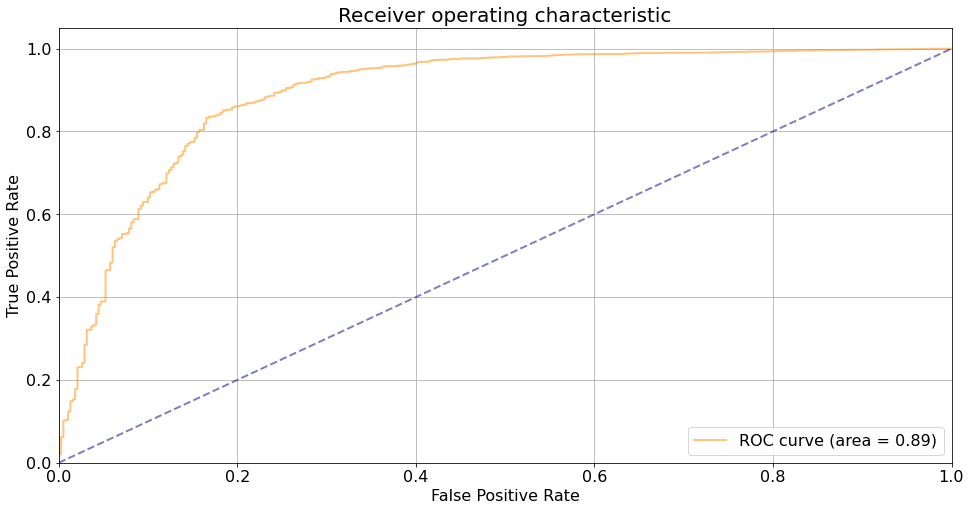

In [59]:
#Using utils to make the pattern easier
from catboost.utils import get_roc_curve
import sklearn
from sklearn import metrics

eval_pool = Pool(X_validation, y_validation, cat_features=cat_features)
curve = get_roc_curve(model, eval_pool)
(fpr, tpr, thresholds) = curve
roc_auc = sklearn.metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8))
lw = 2

plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc, alpha=0.5)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--', alpha=0.5)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True)
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('Receiver operating characteristic', fontsize=20)
plt.legend(loc="lower right", fontsize=16)
plt.show()

The above graph illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied.

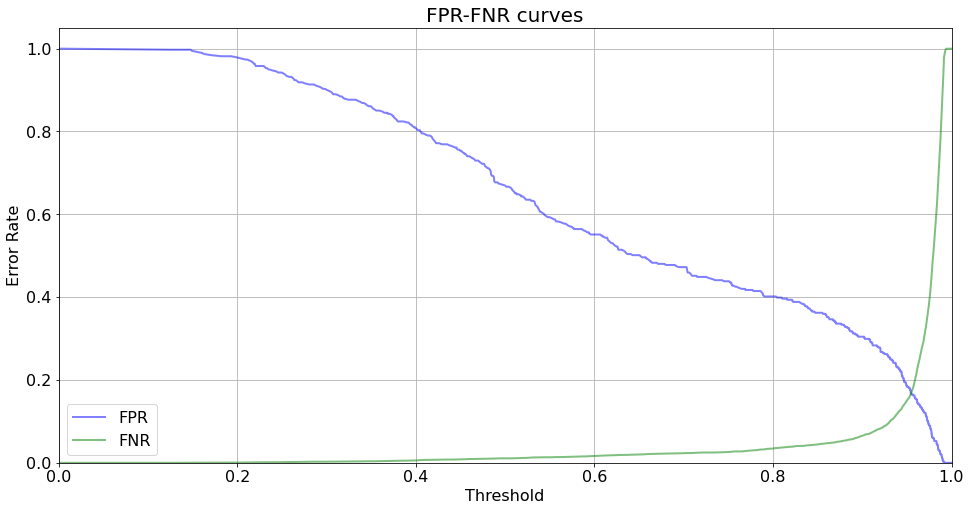

In [64]:
from catboost.utils import get_fpr_curve
from catboost.utils import get_fnr_curve

(thresholds, fpr) = get_fpr_curve(curve=curve)
(thresholds, fnr) = get_fnr_curve(curve=curve)

plt.figure(figsize=(16, 8))
lw = 2

plt.plot(thresholds, fpr, color='blue', lw=lw, label='FPR', alpha=0.5)
plt.plot(thresholds, fnr, color='green', lw=lw, label='FNR', alpha=0.5)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True)
plt.xlabel('Threshold', fontsize=16)
plt.ylabel('Error Rate', fontsize=16)
plt.title('FPR-FNR curves', fontsize=20)
plt.legend(loc="lower left", fontsize=16)
plt.show()

The above graph displays the FPR-FNR curves for error rate and threshold.

In [ ]:
from catboost.utils import select_threshold

print(select_threshold(model=model, data=eval_pool, FNR=0.01))
print(select_threshold(model=model, data=eval_pool, FPR=0.01))

0.4805444481363058
0.9900857295557712


#### <b> Snapshotting </b>

Catboost supports snapshotting. You can use it to recover training after an interruption or start training with previous results.

In [65]:
#!rm 'catboost_info/snapshot.bkp'
from catboost import CatBoostClassifier
model = CatBoostClassifier(
    iterations=100,
    save_snapshot=True,
    snapshot_file='snapshot.bkp',
    snapshot_interval=1,
    random_seed=43
)
model.fit(
    X_train, y_train,
    eval_set=(X_validation, y_validation),
    cat_features=cat_features,
    verbose=True
)

Learning rate set to 0.193326
0:	learn: 0.5565905	test: 0.5566217	best: 0.5566217 (0)	total: 7.59ms	remaining: 752ms
1:	learn: 0.4642626	test: 0.4639935	best: 0.4639935 (1)	total: 13.8ms	remaining: 677ms
2:	learn: 0.3989148	test: 0.3981304	best: 0.3981304 (2)	total: 23.1ms	remaining: 746ms
3:	learn: 0.3516186	test: 0.3510286	best: 0.3510286 (3)	total: 27.6ms	remaining: 663ms
4:	learn: 0.3164302	test: 0.3161297	best: 0.3161297 (4)	total: 36.4ms	remaining: 692ms
5:	learn: 0.2906047	test: 0.2905494	best: 0.2905494 (5)	total: 40ms	remaining: 626ms
6:	learn: 0.2710475	test: 0.2708899	best: 0.2708899 (6)	total: 44.3ms	remaining: 589ms
7:	learn: 0.2538458	test: 0.2539798	best: 0.2539798 (7)	total: 55.1ms	remaining: 634ms
8:	learn: 0.2399269	test: 0.2401350	best: 0.2401350 (8)	total: 64.3ms	remaining: 650ms
9:	learn: 0.2298664	test: 0.2304173	best: 0.2304173 (9)	total: 72.9ms	remaining: 656ms
10:	learn: 0.2180381	test: 0.2161946	best: 0.2161946 (10)	total: 82.1ms	remaining: 665ms
11:	learn: 0.

In [76]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(
    iterations=100,
    save_snapshot=True,
    snapshot_file='snapshot.model',
    snapshot_interval=1,
    random_seed=43
)
model.fit(
    X_train, y_train,
    eval_set=(X_validation, y_validation),
    cat_features=cat_features,
    verbose=True
)

Learning rate set to 0.193326
0:	learn: 0.5565905	test: 0.5566217	best: 0.5566217 (0)	total: 8.35ms	remaining: 826ms
1:	learn: 0.4642626	test: 0.4639935	best: 0.4639935 (1)	total: 15ms	remaining: 735ms
2:	learn: 0.3989148	test: 0.3981304	best: 0.3981304 (2)	total: 24.8ms	remaining: 801ms
3:	learn: 0.3516186	test: 0.3510286	best: 0.3510286 (3)	total: 29.7ms	remaining: 712ms
4:	learn: 0.3164302	test: 0.3161297	best: 0.3161297 (4)	total: 39.2ms	remaining: 744ms
5:	learn: 0.2906047	test: 0.2905494	best: 0.2905494 (5)	total: 42.9ms	remaining: 672ms
6:	learn: 0.2710475	test: 0.2708899	best: 0.2708899 (6)	total: 47.4ms	remaining: 630ms
7:	learn: 0.2538458	test: 0.2539798	best: 0.2539798 (7)	total: 59.3ms	remaining: 682ms
8:	learn: 0.2399269	test: 0.2401350	best: 0.2401350 (8)	total: 70ms	remaining: 707ms
9:	learn: 0.2298664	test: 0.2304173	best: 0.2304173 (9)	total: 78.8ms	remaining: 709ms
10:	learn: 0.2180381	test: 0.2161946	best: 0.2161946 (10)	total: 88.4ms	remaining: 715ms
11:	learn: 0.20

In [72]:
model_snap = CatBoostClassifier()

In [78]:
model_snap.load_model("catboost_info/snapshot.model")

CatBoostError: catboost/libs/model/model.cpp:1153: Incorrect model file descriptor

#### <b> Model Predictions </b>

predict_proba gives you the probabilities for the target in array form. The number of probabilities for each row is equal to the number of categories in the target variable.

In [67]:
print(model.predict_proba(X=X_validation))

[[0.0508 0.9492]
 [0.0181 0.9819]
 [0.0179 0.9821]
 ...
 [0.0161 0.9839]
 [0.017  0.983 ]
 [0.0236 0.9764]]


In [68]:
print(model.predict(data=X_validation))

[1 1 1 ... 1 1 1]


In [71]:
# calculating log(odds)
raw_pred = model.predict(
    data=X_validation,
    prediction_type='RawFormulaVal'
)
print(raw_pred)


[2.9282 3.9947 4.0077 ... 4.1115 4.06   3.7207]


In [70]:
from numpy import exp

#Calculating sigmoid
sigmoid = lambda x: 1 / (1 + exp(-x))

probabilities = sigmoid(raw_pred)

print(probabilities)

[0.9492 0.9819 0.9821 ... 0.9839 0.983  0.9764]


The probabilities will be displayed on the screen.

In [ ]:
X_prepared = X_validation.values.astype(str).astype(object)
#For FeaturesData class categorial features must have type str

fast_predictions = model.predict_proba(
    X=FeaturesData(
        cat_feature_data=X_prepared,
        cat_feature_names=list(X_validation)
    )
)
print(fast_predictions)

[[0.0508 0.9492]
 [0.0181 0.9819]
 [0.0179 0.9821]
 ...
 [0.0161 0.9839]
 [0.017  0.983 ]
 [0.0236 0.9764]]


#### <b> Staged Prediction </b>

CatBoost allows to apply a trained model and calculate the results for each i-th tree of the model, taking into consideration only the trees in the range [0; i).

In [82]:
predictions_gen = model.staged_predict_proba(
    data=X_validation,
    ntree_start=15, 
    ntree_end=16, 
    eval_period=1
)
try:
    for iteration, predictions in enumerate(predictions_gen):
        print('Iteration ' + str(iteration) + ', predictions:')
        print(predictions)
except Exception:
    pass

Iteration 0, predictions:
[[0.4735 0.5265]
 [0.4735 0.5265]
 [0.4735 0.5265]
 ...
 [0.4735 0.5265]
 [0.4735 0.5265]
 [0.4735 0.5265]]


#### <b> Solving Multiclass Classification Problem </b>

Let us solve the **Multiclass Classification Problem** using the **CatBoostClassifier.**

In [83]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(
    iterations=50,
    random_seed=43,
    loss_function='MultiClass'
)
model.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_validation, y_validation),
    verbose=False,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

For multiclass problems with many classes, sometimes, it's better to solve classification problems using ranking. To do that, we will build a dataset with groups. Every group will represent one object from our initial dataset. But it will have one additional categorical feature, a possible class value. Target values will be equal to 1 if the class value is equal to the correct class and 0 otherwise. Thus, each group will have exactly one 1 in labels and some zeros. You can put all possible class values in the group, or you can try setting only hard negatives if there are too many labels. We'll show this approach as an example of a binary classification problem.

In [89]:
ranking_matrix = []
ranking_labels = []
group_ids = []

X_train_matrix = X.values
y_train_vector = y.values

In [90]:
X_train_matrix

array([[ 39353,  85475, 117961, ..., 117906, 290919, 117908],
       [ 17183,   1540, 117961, ..., 118536, 308574, 118539],
       [ 36724,  14457, 118219, ..., 267952,  19721, 117880],
       ...,
       [ 34924,  28805, 117961, ..., 152038, 118612, 124924],
       [ 80574,  55643, 118256, ..., 280788, 292795, 119082],
       [ 14354,  59575, 117916, ..., 122142,  19721, 118570]])

In [91]:
for obj_idx in range(5):
    obj = list(X_train_matrix[obj_idx])
    print(obj)

[39353, 85475, 117961, 118300, 123472, 117905, 117906, 290919, 117908]
[17183, 1540, 117961, 118343, 123125, 118536, 118536, 308574, 118539]
[36724, 14457, 118219, 118220, 117884, 117879, 267952, 19721, 117880]
[36135, 5396, 117961, 118343, 119993, 118321, 240983, 290919, 118322]
[42680, 5905, 117929, 117930, 119569, 119323, 123932, 19793, 119325]


In [93]:
start_group_id=0

In [94]:
for obj_idx in range(X.shape[0]):
    obj = list(X_train_matrix[obj_idx])

    for label in [0,1]:
        obj_of_given_class = deepcopy(obj)
        obj_of_given_class.append(label)
        ranking_matrix.append(obj_of_given_class)
        ranking_labels.append(float(y_train_vector[obj_idx] == label)) 
        group_ids.append(start_group_id + obj_idx)

final_cat_features = deepcopy(cat_features)
final_cat_features.append(X.shape[1])

In [95]:
final_cat_features

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [99]:
ranking_matrix

[[39353, 85475, 117961, 118300, 123472, 117905, 117906, 290919, 117908, 0],
 [39353, 85475, 117961, 118300, 123472, 117905, 117906, 290919, 117908, 0],
 [39353, 85475, 117961, 118300, 123472, 117905, 117906, 290919, 117908, 1],
 [17183, 1540, 117961, 118343, 123125, 118536, 118536, 308574, 118539, 0],
 [17183, 1540, 117961, 118343, 123125, 118536, 118536, 308574, 118539, 1],
 [36724, 14457, 118219, 118220, 117884, 117879, 267952, 19721, 117880, 0],
 [36724, 14457, 118219, 118220, 117884, 117879, 267952, 19721, 117880, 1],
 [36135, 5396, 117961, 118343, 119993, 118321, 240983, 290919, 118322, 0],
 [36135, 5396, 117961, 118343, 119993, 118321, 240983, 290919, 118322, 1],
 [42680, 5905, 117929, 117930, 119569, 119323, 123932, 19793, 119325, 0],
 [42680, 5905, 117929, 117930, 119569, 119323, 123932, 19793, 119325, 1],
 [45333, 14561, 117951, 117952, 118008, 118568, 118568, 19721, 118570, 0],
 [45333, 14561, 117951, 117952, 118008, 118568, 118568, 19721, 118570, 1],
 [25993, 17227, 117961, 

In [100]:
#Defining custom function to build multiclass ranking
from copy import deepcopy
def build_multiclass_ranking_dataset(X, y, cat_features, label_values=[0,1], start_group_id=0):
    ranking_matrix = []
    ranking_labels = []
    group_ids = []

    X_train_matrix = X.values
    y_train_vector = y.values

    for obj_idx in range(X.shape[0]):
        obj = list(X_train_matrix[obj_idx])

        for label in label_values:
            obj_of_given_class = deepcopy(obj)
            obj_of_given_class.append(label)
            ranking_matrix.append(obj_of_given_class)
            ranking_labels.append(float(y_train_vector[obj_idx] == label)) 
            group_ids.append(start_group_id + obj_idx)
        
    final_cat_features = deepcopy(cat_features)
    final_cat_features.append(X.shape[1]) # new feature that we are adding should be categorical.
    return Pool(ranking_matrix, ranking_labels, cat_features=final_cat_features, group_id = group_ids)

In [103]:
from catboost import CatBoost
params = {'iterations':500, 'learning_rate':0.01, 'l2_leaf_reg':30, 'random_seed':0, 'loss_function':'QuerySoftMax'}

groupwise_train_pool = build_multiclass_ranking_dataset(X_train, y_train, cat_features, [0,1])
groupwise_eval_pool = build_multiclass_ranking_dataset(X_validation, y_validation, cat_features, [0,1], X_train.shape[0])

In [104]:
model = CatBoost(params)
model.fit(
    X=groupwise_train_pool,
    verbose=False,
    eval_set=groupwise_eval_pool,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Making predictions with ranking mode

In [105]:
import math

obj = list(X_validation.values[0])
ratings = []
for label in [0,1]:
    obj_with_label = deepcopy(obj)
    obj_with_label.append(label)
    rating = model.predict([obj_with_label])[0]
    ratings.append(rating)
print('Raw values:', np.array(ratings))

def soft_max(values):
    return [math.exp(val) / sum([math.exp(val) for val in values]) for val in values]

print('Probabilities', np.array(soft_max(ratings)))

Raw values: [-1.3755  1.4606]
Probabilities [0.0554 0.9446]


#### <b> Metric Evaluation on a New Dataset </b>

Let us perform **Metric Evaluation** on a new dataset using the training data.

In [106]:
model = CatBoostClassifier(
    random_seed=63,
    iterations=200,
    learning_rate=0.03,
)
model.fit(
    X_train, y_train,
    cat_features=cat_features,
    verbose=50
)

0:	learn: 0.6569860	total: 18.5ms	remaining: 3.69s
50:	learn: 0.1923495	total: 1.14s	remaining: 3.33s
100:	learn: 0.1653594	total: 2.43s	remaining: 2.38s
150:	learn: 0.1570631	total: 4.02s	remaining: 1.3s
199:	learn: 0.1538962	total: 5.72s	remaining: 0us


In [107]:
metrics = model.eval_metrics(
    data=pool1,
    metrics=['Logloss','AUC'],
    ntree_start=0,
    ntree_end=0,
    eval_period=1,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [ ]:
print('AUC values:')
print(np.array(metrics['AUC']))

AUC values:
[0.4998 0.538  0.5504 0.5888 0.6536 0.6515 0.6476 0.648  0.7117 0.731
 0.7277 0.7278 0.7299 0.7298 0.7275 0.7273 0.7336 0.735  0.7445 0.7606
 0.7627 0.7627 0.7731 0.7769 0.7866 0.7985 0.7986 0.8008 0.8004 0.8004
 0.8191 0.8357 0.8518 0.8666 0.8851 0.8855 0.8886 0.8931 0.8936 0.8991
 0.9033 0.9115 0.9126 0.9136 0.9148 0.9163 0.9177 0.9184 0.9206 0.9211
 0.9259 0.9289 0.9291 0.9324 0.9329 0.9334 0.9338 0.9358 0.937  0.9383
 0.9386 0.9385 0.939  0.9396 0.94   0.9401 0.941  0.9411 0.942  0.9425
 0.944  0.9457 0.9471 0.9479 0.9489 0.9499 0.9512 0.9522 0.9527 0.9533
 0.9537 0.9541 0.9543 0.9547 0.955  0.9553 0.9554 0.9558 0.9558 0.9563
 0.9575 0.9584 0.9592 0.9597 0.9603 0.961  0.9614 0.9617 0.962  0.9624
 0.9627 0.963  0.9634 0.964  0.9642 0.9644 0.9648 0.9649 0.9653 0.9655
 0.9657 0.9657 0.9658 0.966  0.9661 0.9662 0.9663 0.9665 0.9665 0.9666
 0.9667 0.9669 0.967  0.9675 0.968  0.9683 0.9689 0.9694 0.9699 0.9703
 0.9706 0.9709 0.9711 0.9715 0.9715 0.9718 0.9719 0.9719 0.9723 0.

#### <b> Feature Importances </b>

<b> Feature importance </b> refers to techniques that assign a score to input features based on how useful they are at predicting a target variable.

In [109]:
#To find feature importance
model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,RESOURCE,22.459777
1,MGR_ID,17.115632
2,ROLE_DEPTNAME,16.054805
3,ROLE_ROLLUP_2,13.975879
4,ROLE_CODE,10.030076
5,ROLE_FAMILY_DESC,7.517166
6,ROLE_TITLE,6.526255
7,ROLE_FAMILY,3.704980
8,ROLE_ROLLUP_1,2.615430


Scores are assigned to the input features.

#### <b> Feature Evaluation </b>

Let us perform feature evaluation using the **eval_features( )** function.

In [110]:
from catboost.eval.catboost_evaluation import *
learn_params = {'iterations': 20, # 2000
                'learning_rate': 0.5, #we set big learning_rate, because we have small iterations
                'random_seed': 0,
                'verbose': False,
                'loss_function' : 'Logloss',
                'boosting_type': 'Plain'}
evaluator = CatboostEvaluation('amazon/train.tsv',
                               fold_size=10000, #<= 50% of dataset
                               fold_count=20,
                               column_description='amazon/train.cd',
                               partition_random_seed=0,
                               #working_dir=... 
)
result = evaluator.eval_features(learn_config=learn_params,
                                 eval_metrics=['Logloss', 'Accuracy'],
                                 features_to_eval=[6, 7, 8])

from catboost.eval.evaluation_result import *
logloss_result = result.get_metric_results('Logloss')
logloss_result.get_baseline_comparison(
    ScoreConfig(ScoreType.Rel, overfit_iterations_info=False)
)

,PValue,Score,Quantile 0.005,Quantile 0.995,Decision
Features: 6,0.000189,1.010962,0.612296,1.392096,GOOD
Features: 7,0.681322,-0.033237,-0.351232,0.310979,UNKNOWN
Features: 8,0.005111,-0.439271,-0.803377,-0.117756,BAD


#### <b> Saving the Model </b>

In [111]:
my_best_model = CatBoostClassifier(iterations=10)
my_best_model.fit(
    X_train, y_train,
    eval_set=(X_validation, y_validation),
    cat_features=cat_features,
    verbose=False
)
my_best_model.save_model('catboost_model.bin')
my_best_model.save_model('catboost_model.json', format='json')

In [115]:
# Load the model and apply
amazonModel = CatBoostClassifier()

amazonModel.load_model("catboost_model.bin")

amazonModel.predict(X_validation)

array([1, 1, 1, ..., 1, 1, 1])

### **Hyperparameter Tunning**

In [4]:
from catboost import CatBoostClassifier
import numpy as np

train_data = np.random.randint(1, 100, size=(100, 10))
train_labels = np.random.randint(2, size=(100))

In [3]:
train_labels

array([1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1])

In [5]:
model = CatBoostClassifier()

grid = {'learning_rate': [0.03, 0.1],
        'depth': [4, 6, 10],
        'l2_leaf_reg': [1, 3, 5, 7, 9]}

In [ ]:
model.grid_search()

In [ ]:
grid_search_result = model.grid_search(grid, 
                                       X=train_data, 
                                       y=train_labels, 
                                       plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6876486	test: 0.6920986	best: 0.6920986 (0)	total: 46.2ms	remaining: 46.2s
1:	learn: 0.6799953	test: 0.6979287	best: 0.6920986 (0)	total: 46.8ms	remaining: 23.3s
2:	learn: 0.6753765	test: 0.6938308	best: 0.6920986 (0)	total: 47.2ms	remaining: 15.7s
3:	learn: 0.6663111	test: 0.6993676	best: 0.6920986 (0)	total: 47.7ms	remaining: 11.9s
4:	learn: 0.6621034	test: 0.7002137	best: 0.6920986 (0)	total: 48.1ms	remaining: 9.57s
5:	learn: 0.6575850	test: 0.6942093	best: 0.6920986 (0)	total: 48.5ms	remaining: 8.04s
6:	learn: 0.6498049	test: 0.6960354	best: 0.6920986 (0)	total: 48.9ms	remaining: 6.94s
7:	learn: 0.6433578	test: 0.7037141	best: 0.6920986 (0)	total: 49.4ms	remaining: 6.12s
8:	learn: 0.6382734	test: 0.7025735	best: 0.6920986 (0)	total: 49.8ms	remaining: 5.48s
9:	learn: 0.6354991	test: 0.7050376	best: 0.6920986 (0)	total: 50.2ms	remaining: 4.97s
10:	learn: 0.6247262	test: 0.7036364	best: 0.6920986 (0)	total: 50.6ms	remaining: 4.55s
11:	learn: 0.6179023	test: 0.7064921	best:

Hyperparameter tuning is the process of determining the right combination of hyperparameters that allows the model to maximize model performance. Setting the correct combination of hyperparameters is the only way to extract the maximum performance out of models.

#### <b> Training Speed </b>

In [116]:
from catboost import CatBoost
fast_model = CatBoostClassifier(
    random_seed=63,
    iterations=150,
    learning_rate=0.01,
    boosting_type='Plain',
    bootstrap_type='Bernoulli',
    subsample=0.5,
    one_hot_max_size=20,
    rsm=0.5,
    leaf_estimation_iterations=5,
    max_ctr_complexity=1)

fast_model.fit(
    X_train, y_train,
    cat_features=cat_features,
    verbose=False,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

#### <b> Accuracy </b>

In [128]:
tunned_model = CatBoostClassifier(
    random_seed=63,
    iterations=1000,
    learning_rate=0.03,
    l2_leaf_reg=3,
    bagging_temperature=1,
    random_strength=1,
    one_hot_max_size=2,
    leaf_estimation_method='Newton',thread_count=-1,verbose=True
)
tunned_model.fit(
    X_train, y_train,
    cat_features=cat_features,
    verbose=False,
    eval_set=(X_validation, y_validation),
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

#### <b> Training the Model after Parameter Tuning </b>

In [ ]:
best_model = CatBoostClassifier(
    random_seed=63,
    iterations=int(tunned_model.tree_count_ * 1.2),
)
best_model.fit(
    X, y,
    cat_features=cat_features,
    verbose=100
)

Learning rate set to 0.043372
0:	learn: 0.6422041	total: 16ms	remaining: 16.9s
100:	learn: 0.1537302	total: 2.94s	remaining: 27.8s
200:	learn: 0.1466783	total: 6.66s	remaining: 28.4s
300:	learn: 0.1428331	total: 10.3s	remaining: 26s
400:	learn: 0.1389527	total: 14.2s	remaining: 23.3s
500:	learn: 0.1354927	total: 18.1s	remaining: 20.1s
600:	learn: 0.1327491	total: 22s	remaining: 16.7s
700:	learn: 0.1297104	total: 25.9s	remaining: 13.2s
800:	learn: 0.1270650	total: 29.7s	remaining: 9.57s
900:	learn: 0.1243689	total: 33.5s	remaining: 5.88s
1000:	learn: 0.1221292	total: 37.6s	remaining: 2.18s
1058:	learn: 0.1207668	total: 39.8s	remaining: 0us


#### <b> Calculate Prediction </b>

In [ ]:
#Let us calculate contest predictions
X_test = test_df.drop('id', axis=1)
test_pool = Pool(data=X_test, cat_features=cat_features)
contest_predictions = best_model.predict_proba(test_pool)
print('Predictions:')
print(contest_predictions)

Predictions:
[[0.4144 0.5856]
 [0.0167 0.9833]
 [0.0102 0.9898]
 ...
 [0.0052 0.9948]
 [0.0438 0.9562]
 [0.0113 0.9887]]


### <b>Voting Ensemble</b>

Voting is one of the simplest ways of combining the predictions from multiple machine learning algorithms.

It works by first creating two or more standalone models from your training dataset. A Voting Classifier can then be used to wrap your models and average the predictions of the submodels when asked to make predictions for new data.

The predictions of the submodels can be weighted, but specifying the weights for classifiers manually or even heuristically is difficult. More advanced methods can learn how to best weight the predictions from submodels, but this is called stacking (stacked generalization) and is currently not provided in scikit-learn.

You can create a voting ensemble model for classification using the **VotingClassifier** class.

The code below provides an example of combining the predictions of logistic regression, classification, and regression trees and support vector machines together for a classification problem.


In [120]:
#Voting Ensemble for Classification
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier,VotingRegressor

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pandas.read_csv(url, names=names)

array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
seed = 7
kfold = model_selection.KFold(n_splits=10)

#Create the sub models
estimators = []
model1 = LogisticRegression(max_iter=1000)
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC()
estimators.append(('svm', model3))

In [121]:
estimators

[('logistic', LogisticRegression(max_iter=1000)),
 ('cart', DecisionTreeClassifier()),
 ('svm', SVC())]

In [122]:
#Create the ensemble model
ensemble = VotingClassifier(estimators)
results = model_selection.cross_val_score(ensemble, X, Y, cv=kfold)
print(results.mean())

0.7642857142857143


In [124]:
ensemble.fit(X,Y)

VotingClassifier(estimators=[('logistic', LogisticRegression(max_iter=1000)),
                             ('cart', DecisionTreeClassifier()),
                             ('svm', SVC())])

In [125]:
ensemble.predict(X)

array([1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1.,
       1., 0., 1., 0., 0.

**Note: In this lesson, we saw the use of the ensemble learning methods, and in the next lesson, we will be working on Recommender Systems.**

![Simplilearn_Logo](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/Logo_Powered_By_Simplilearn/SL_Logo_1.png)